In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ford-car-price-prediction/ford.csv


In [2]:
df = pd.read_csv('/kaggle/input/ford-car-price-prediction/ford.csv')

In [3]:
df.shape

(17966, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
df = df.drop(df.duplicated().sum())

In [9]:
df.shape

(17965, 9)

In [10]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866407,12279.550682,23362.150626,113.327693,57.906546,1.350827
std,2.050376,4741.475148,19472.499486,62.013732,10.125811,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31048.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


# Visualization

In [13]:
df.drop('year', axis = 1, inplace = True)

In [18]:
df_cont = df.select_dtypes(exclude = 'object')
df_cont.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

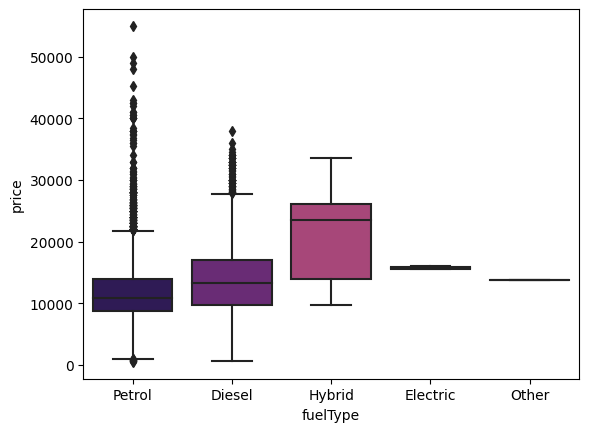

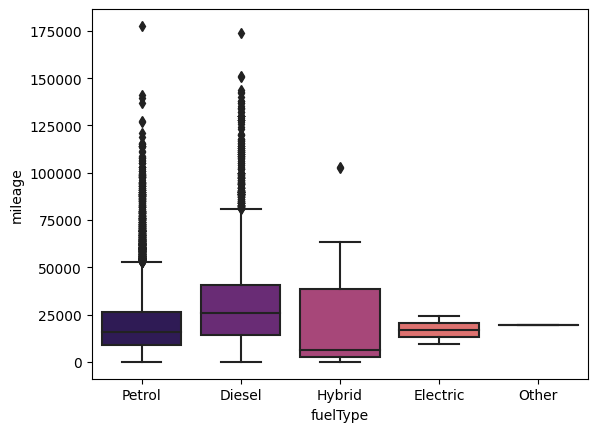

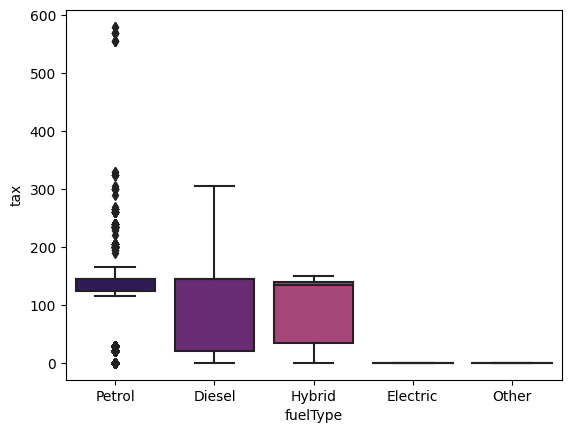

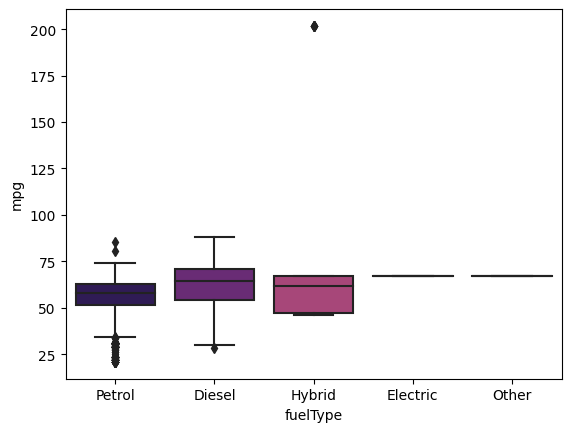

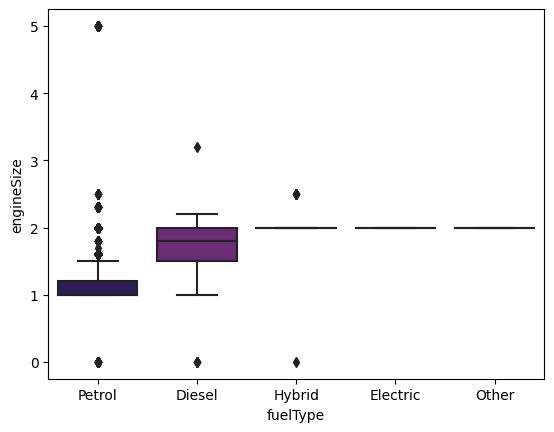

In [21]:
for col in df_cont.columns:
    sns.boxplot(x = 'fuelType', y = col, data = df, palette  = 'magma')
    plt.show()

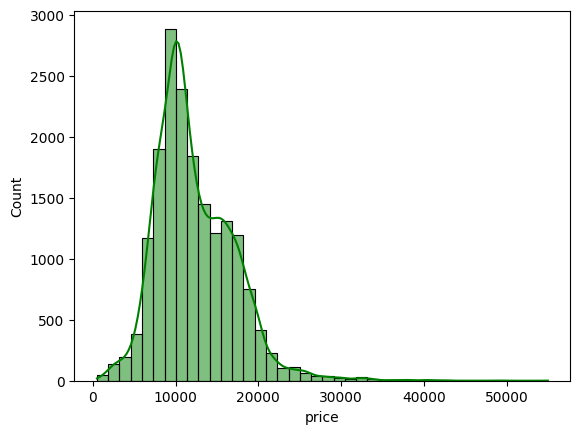

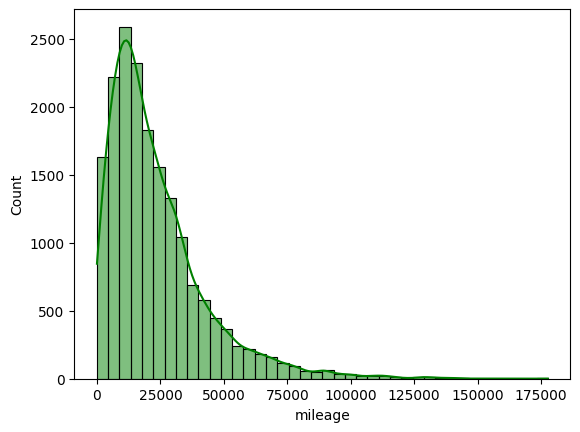

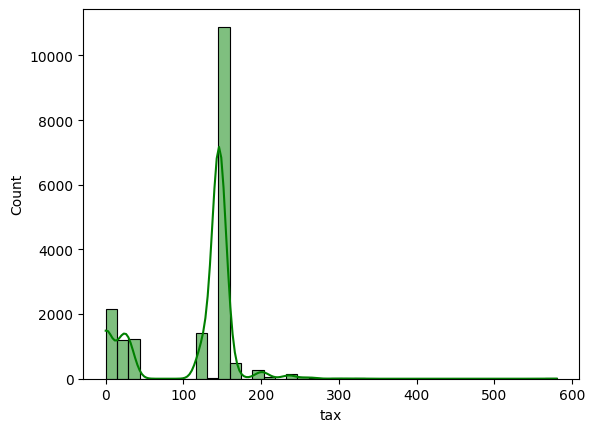

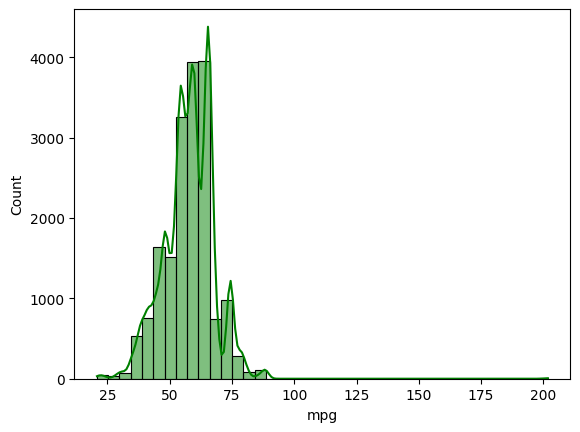

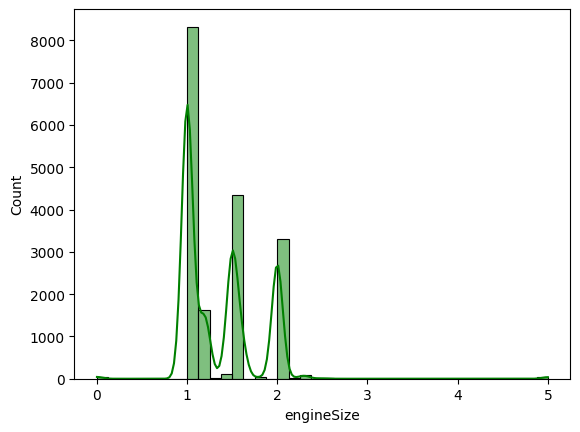

In [29]:
for col in df_cont.columns:
    sns.histplot(x = col, bins = 40, kde = True, color = 'green',data = df, palette  = 'magma')
    plt.show()

In [34]:
df.columns

Index(['model', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

Text(0, 0.5, '')

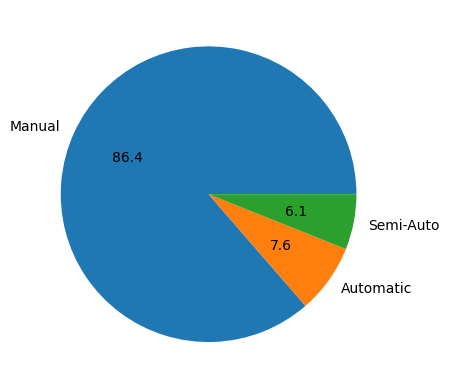

In [38]:
df.transmission.value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)

<Axes: xlabel='model'>

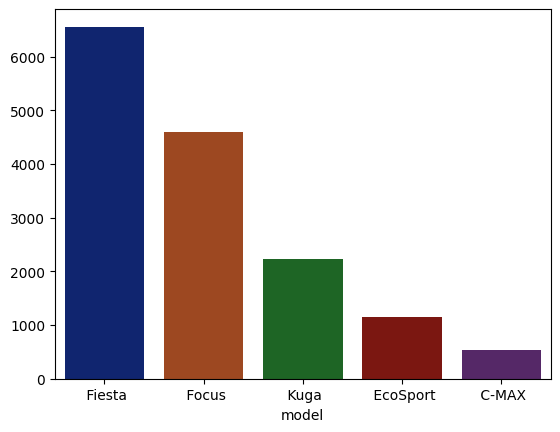

In [46]:
df_top_models = df.model.value_counts().sort_values(ascending = False).head()
sns.barplot(x = df_top_models.index, y = df_top_models.values, palette = 'dark')

# Linear Regression

In [48]:
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,16500,Automatic,1482,Petrol,145,48.7,1.0


In [49]:
df_new = df.copy()

In [50]:
# model name is not releavant in making price prediction
df_new.drop('model', axis = 1, inplace = True)

In [51]:
df_new.head(3)

,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,Automatic,15944,Petrol,150,57.7,1.0
1,14000,Manual,9083,Petrol,150,57.7,1.0
2,13000,Manual,12456,Petrol,150,57.7,1.0


In [52]:
x = df_new.drop('price', axis = 1)
y = df_new['price']

In [53]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [61]:
scaler = StandardScaler()
encoder = OneHotEncoder()

In [54]:
x.columns

Index(['transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'], dtype='object')

In [55]:
categorical_columns = ['transmission','fuelType']
continuos_columns = ['mileage','tax', 'mpg', 'engineSize']

In [58]:
for col in continuos_columns:
    x[col] = scaler.fit_transform(x[[col]])

In [67]:
x_encoded = pd.get_dummies(x, columns=categorical_columns,drop_first=True,dtype=int)

In [69]:
x_encoded.head()

,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.380966,0.591374,-0.020399,-0.811424,0,0,0,0,0,1
1,-0.733319,0.591374,-0.020399,-0.811424,1,0,0,0,0,1
2,-0.560095,0.591374,-0.020399,-0.811424,1,0,0,0,0,1
3,-0.662602,0.510745,-1.738827,0.345022,1,0,0,0,0,1
4,-1.123675,0.510745,-0.909241,-0.811424,0,0,0,0,0,1


<Axes: >

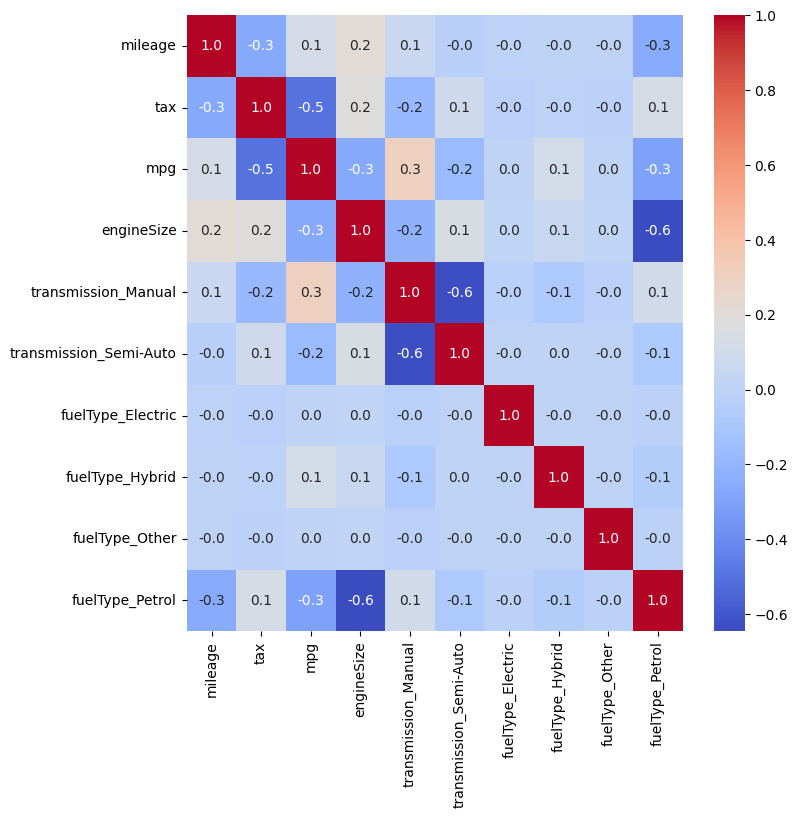

In [82]:
plt.figure(figsize=(8,8))
sns.heatmap(x_encoded.corr(numeric_only = True),annot = True, cmap = 'coolwarm',fmt = '.1f')

In [72]:
import statsmodels.api as sm

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y, test_size=0.3, random_state=42)

In [77]:
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test)

In [78]:
model = sm.OLS(y_train,x_train_const).fit()

In [79]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2106.
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:27:56   Log-Likelihood:            -1.1817e+05
No. Observations:               12575   AIC:                         2.364e+05
Df Residuals:                   12564   BIC:                         2.364e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.46

- remarks = fueltype electric and other are statistically insignificant

In [87]:
x_train_const.columns

Index(['const', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [92]:
# removing electric and other fuel type
significant_var = ['const','mileage', 'tax', 'mpg', 'engineSize', 'transmission_Manual','transmission_Semi-Auto', 'fuelType_Hybrid', 'fuelType_Petrol']

In [94]:
model2 = model = sm.OLS(y_train,x_train_const[significant_var]).fit()

In [95]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2633.
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:36:25   Log-Likelihood:            -1.1817e+05
No. Observations:               12575   AIC:                         2.364e+05
Df Residuals:                   12566   BIC:                         2.364e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.46

In [98]:
y_pred = model2.predict(x_test_const[significant_var])

In [100]:
y_pred[:3]

17610     8777.762782
7077      5832.361153
1714     10828.009432
dtype: float64

In [102]:
y_test.head(3)

17610    6995
7077     7040
1714     8998
Name: price, dtype: int64

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [105]:
mse = mean_squared_error(y_test,y_pred)
mse

8463846.772110317

In [106]:
mae = mean_absolute_error(y_test,y_pred)
mae

2199.0965284828726

In [107]:
rmse = mse**0.5
rmse

2909.269113043741